In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

**Завдання 1**

In [47]:
img_list = os.listdir("./assignments/dataset")
img_list.sort() 
print(img_list)

['image_0001.jpg', 'image_0002.jpg', 'image_0003.jpg', 'image_0004.jpg', 'image_0005.jpg', 'image_0006.jpg', 'image_0007.jpg', 'image_0008.jpg', 'image_0009.jpg', 'image_0010.jpg']


In [0]:
def data_augmentation(img):
  height = img.shape[0]
  width = img.shape[1]
  #інверсія яскравості пікселів
  for i in range(height):
    for j in range(width):
      img[i][j]=254-img[i][j]
  #гамма корекція яскравості пікселів
  gamma=0.5
  img=np.power(img,gamma)
  img=(img/np.max(img)*255).astype(np.uint8)
  #згладжування зображення
  img=cv2.GaussianBlur(img, (3,3), 0)
  #перевернути зображення горизонтально
  src = np.float32([[0, 0],[0, height],[width, height],[width,0]])
  dst = np.float32([[0, height],[0, 0],[width,0],[width, height]])
  Mper=cv2.getPerspectiveTransform(src,dst)
  img=cv2.warpPerspective(img,Mper,(width,height))
  #переміщення зображення
  M=np.float32([[1,0,-width*1/4],
               [0,1,height*1/5]])
  img=cv2.warpAffine(img,M,(width, height), borderValue=255)
  #обертання зображення
  M180=cv2.getRotationMatrix2D((width/2, height/2), 180, 1)
  img=cv2.warpAffine(img,M180,(width, height))
  #перекіс зображення
  skew=np.float32([[1,1,1],
                  [0,1,1]])
  img=cv2.warpAffine(img,skew,(width,height))
  return img

In [49]:
for i in img_list:
  img_path="./assignments/dataset/" + i
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  aug_path="./assignments/dataset/" + "aug"+i
  cv2.imwrite(aug_path, data_augmentation(img))
  print(aug_path + " saved!")
  

./assignments/dataset/augimage_0001.jpg saved!
./assignments/dataset/augimage_0002.jpg saved!
./assignments/dataset/augimage_0003.jpg saved!
./assignments/dataset/augimage_0004.jpg saved!
./assignments/dataset/augimage_0005.jpg saved!
./assignments/dataset/augimage_0006.jpg saved!
./assignments/dataset/augimage_0007.jpg saved!
./assignments/dataset/augimage_0008.jpg saved!
./assignments/dataset/augimage_0009.jpg saved!
./assignments/dataset/augimage_0010.jpg saved!


[]

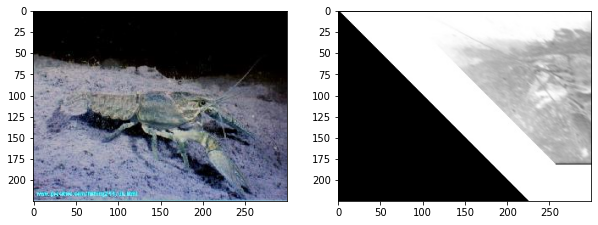

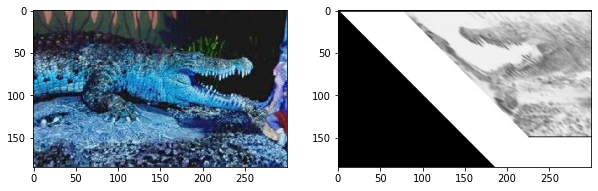

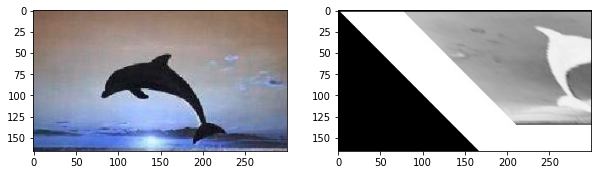

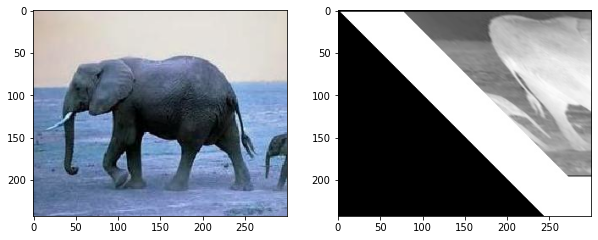

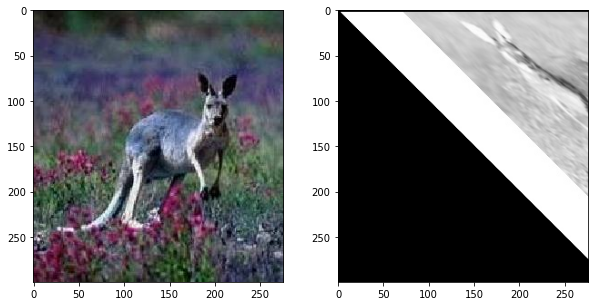

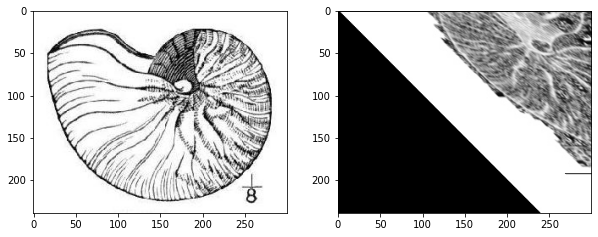

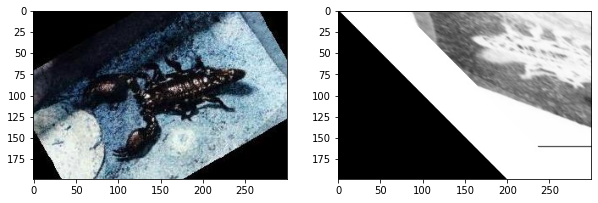

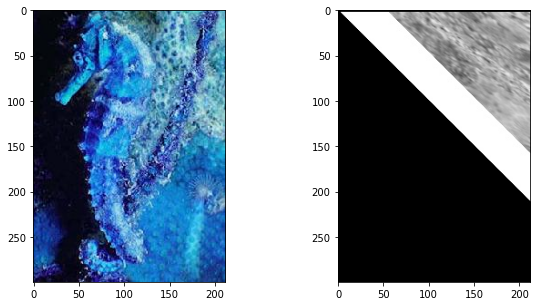

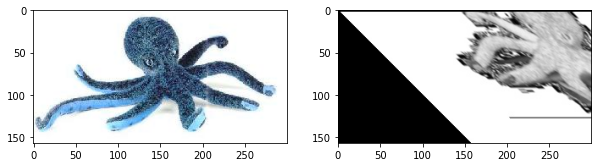

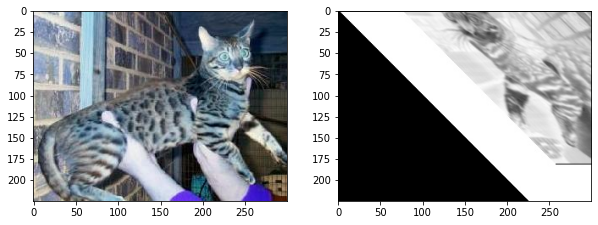

In [54]:
for i in img_list:
  img_path="./assignments/dataset/" + i
  aug_path="./assignments/dataset/" + "aug"+i
  img = cv2.imread(img_path)
  aug = cv2.imread(aug_path)
  plt.figure(figsize=(10,5))
  plt.subplot(121)
  plt.imshow(img)
  plt.subplot(122)
  plt.imshow(aug)
plt.plot()


**Завдання 2**

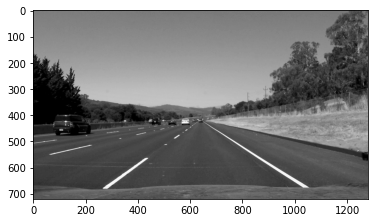

In [33]:
img_path = "./assignments/test_img.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
OUT_IMG_WIDTH = 500
OUT_IMG_HEIGHT = 500
plt.imshow(img, cmap='gray')

In [0]:
src = np.float32([[590, 450], [695, 450], [1060, 662], [252, 662]]) 
dst = np.float32([[10, 10], [490, 10], [490, 490], [10, 490]])

In [0]:
M = cv2.getPerspectiveTransform(src, dst)

In [0]:
wraped_img = cv2.warpPerspective(img, M, (OUT_IMG_WIDTH, OUT_IMG_HEIGHT))

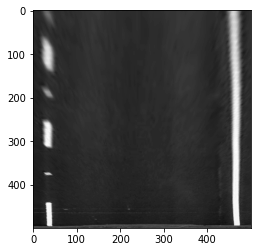

In [37]:
plt.imshow(wraped_img, cmap='gray')
plt.show()